# Les equation différentielles avec Python


# Introduction
Tentative de simplification <b>extrême</b> de la résolution d'équations différentielles avec Python, avec un <b>cas pratique systématique</b>, un exemple de <b>la vie réelle</b>. On débute avec ce qui est le plus simple possible.

*  Création en cours * SUJET A LOURDES MODIFICATIONS

# Les phrases les plus simples du monde pour comprendre les eq diffs.

- Plus la vitesse d'une auto est grande, plus le frottement de l'air est fort
- Plus la population est grande, plus la vitesse d'accroissement de la population est grande

# Comprendre ce qu'est l'équation différentielle la plus simple: 

"Dans un référentiel de temps,
La vitesse de variation d'une quantité est proportionnelle à cette quantité même ."

Admettons qu'une population croies de 100% par unité de temps
Par exemple, si au temps 1, la population est de 1,
au temps 2 elle sera de 2, et au temps 3 de 4. ( Acroissement constant)
La vitesse de variation de la population est donc proportionnelle à la quantité de population.

Résoudre l'equation différentielle, c'est tracer cette fonction permet de savoir quelle sera la population au temps 10.

# Notation
Il y en a 2 différentes , pour dire la même chose.

<b>En maths : </b>
y' = a * y

ou

- y' veut dire dérivée de la fonction y ( C'est la pente de cette fonction en un point précis),
vu qu'il y a plusieurs unités de temps, il y en a plusieurs.
- y est une fonction inconnue
- a est une constante réelle

<b>En physique</b>

dx/dt = C

ou 

- x est une variable
- t est une variable
- C est une constante .

Nous pensons souvent que t mesure le temps et x mesure une quantité positive au fil du temps. Autrement dit, x est fonction du temps.
Le nombre k est appelé taux de croissance continue s’il est positif, ou taux de décroissance continue s’il est négatif.
http://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3e/3e_2content_1.html

# Les méthodes de résolution en Python

- Euler explicite ( Il faut la coder) : https://www.youtube.com/watch?v=LkMuRtk1Qg4
- Scipy : https://www.youtube.com/watch?v=UY8LvjQGKGE

# Problème de Cauchy

C'est quand on donne des conditions initiales à l'équation différentielle.



# Exemple 1.

## Equation y' = a * y

## Notre cas pratique.

Admettons qu'une population croies de 100% par unité de temps
Par exemple, si au temps 1, la population est de 1,
au temps 2 elle sera de 2, et au temps 3 de 4. ( Acroissement constant)
La vitesse de variation de la population est donc proportionnelle à la quantité de population.

y' = a * y

## SOlutions Avec Scipy solve_ivp

Il existe 2 types de solutions , la solution numérique, et la solution graphique.

https://pundit.pratt.duke.edu/wiki/Python:Ordinary_Differential_Equations/Examples



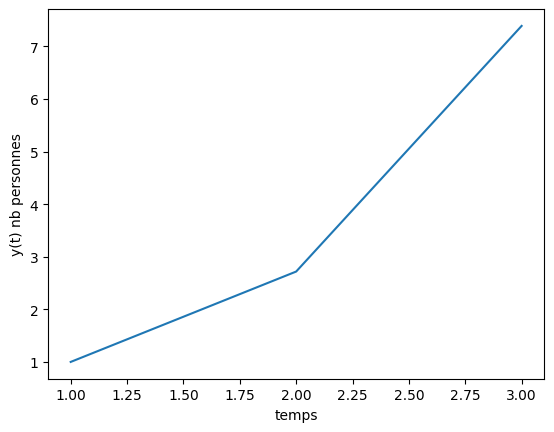

In [72]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Fonction qui retourne dy/dt
def model(y,t):
    k = 1 # rate taux de 100%
    dydt = k * y
    return dydt

# Condition initiale
y0 = 1

# Intervalle de temps , max points , nb points
t = np.linspace(1,3,3)

# Résoudre l'équation  différentielle ( ODE en Anglais)
y = odeint(model,y0,t)

# Dessiner le résultat
plt.plot(t,y)
plt.xlabel('temps')
plt.ylabel('y(t) nb personnes')
plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
def state_plotter(times, states, fig_num):
    num_states = np.shape(states)[0]
    num_cols = int(np.ceil(np.sqrt(num_states)))
    num_rows = int(np.ceil(num_states / num_cols))
    plt.figure(fig_num)
    plt.clf()
    fig, ax = plt.subplots(num_rows, num_cols, num=fig_num, clear=True,
                         squeeze=False)
    for n in range(num_states):
        row = n // num_cols
        col = n % num_cols
        ax[row][col].plot(times, states[n], 'k.:')
        ax[row][col].set(xlabel='Time',
                         ylabel='$y_{:0.0f}(t)$'.format(n),
                         title='$y_{:0.0f}(t)$ vs. Time'.format(n))
        
    for n in range(num_states, num_rows * num_cols):
        fig.delaxes(ax[n // num_cols][n % num_cols])

    fig.tight_layout()

    return fig, ax

(<Figure size 640x480 with 1 Axes>,
 array([[<AxesSubplot: title={'center': '$y_0(t)$ vs. Time'}, xlabel='Time', ylabel='$y_0(t)$'>]],
       dtype=object))

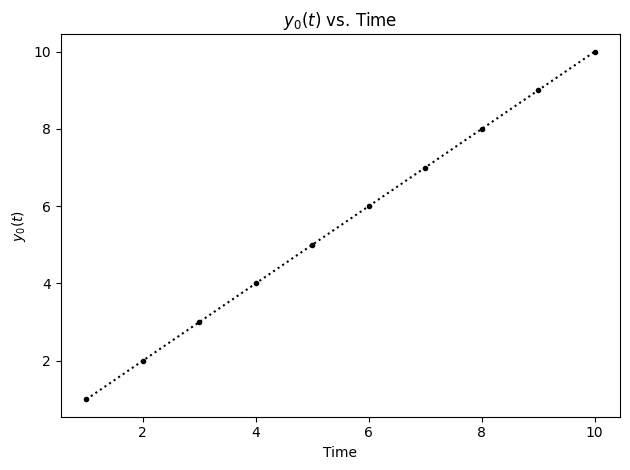

In [55]:
# %% Imports

import numpy as np

import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

# %% Define independent function and derivative function

def f(t, y, c):

    dydt = [c[0]]

    return dydt


# %% Define time spans, initial values, and constants

tspan = np.linspace(1, 10, 10)
yinit = [1] # Population de départ
c = [1.0] # Taux d'acroissement 1.0 = 100%


# %% Solve differential equation

sol = solve_ivp(lambda t, y: f(t, y, c), 

                [tspan[0], tspan[-1]], yinit, t_eval=tspan, rtol = 1e-5)


# %% Plot states

state_plotter(sol.t, sol.y, 1)

In [56]:
from scipy.integrate import solve_ivp
import numpy as np

# Définition de l'équation différentielle
def equation(t, y):
    a = 0.1
    return a


t0 = 0  # seconde
tf = 1  # seconde
y0 = 0  # Condition initiale

# Résolution
solution = solve_ivp(equation, [t0, tf], [y0], max_step=0.1)

print(solution.t)  # Affichage de la table des instants
print(solution.y[0])  # Affichage des résultats

[0.000e+00 1.000e-04 1.100e-03 1.110e-02 1.111e-01 2.111e-01 3.111e-01
 4.111e-01 5.111e-01 6.111e-01 7.111e-01 8.111e-01 9.111e-01 1.000e+00]
[0.000e+00 1.000e-05 1.100e-04 1.110e-03 1.111e-02 2.111e-02 3.111e-02
 4.111e-02 5.111e-02 6.111e-02 7.111e-02 8.111e-02 9.111e-02 1.000e-01]


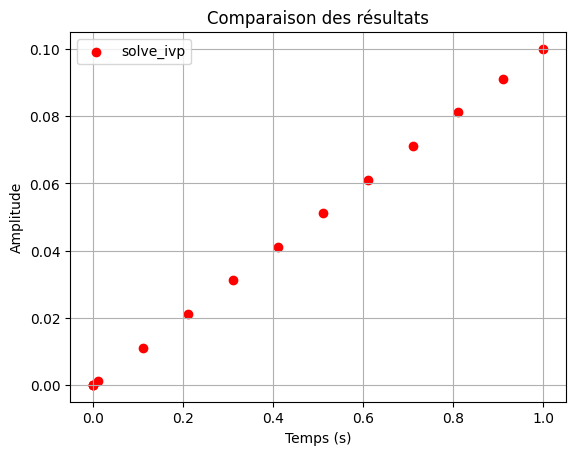

In [57]:
import matplotlib.pyplot as plt

# Tracé des deux résultats
plt.scatter(solution.t, solution.y[0], label="solve_ivp", color="red")
plt.ylabel('Amplitude')
plt.xlabel("Temps (s)")
plt.title("Comparaison des résultats")
plt.grid(which="both")
plt.legend()
plt.show()